#### < 미션#2 >   5팀 전수현
## Hotel Booking Demand Datasets

- 예약취소와 관련이 있는 요소들을 분석
- 예약 취소율을 줄이기 위한 방안

## 1. Load data

In [64]:
# data 불러오기
import pandas as pd

df = pd.read_csv("hotel_data_modified.csv")
df.shape

(119390, 29)

In [65]:
# data 앞부분 미리보기
df.head()
total_count = len(df) # 총 예약수수

In [66]:
df.info()  # 열 이름, 결측치, 타입 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 29 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [67]:
df.describe()  # 수치형 변수 요약 통계

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,8.000000,5.000000


In [68]:
df.columns  # 컬럼 이름 목록

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'agent', 'company',
       'days_in_waiting_list', 'required_car_parking_spaces',
       'total_of_special_requests', 'reservation_status',
       'reservation_status_date'],
      dtype='object')

## 1. Data Preprocessing
머신러닝의 가장 기본적이면서도 중요한 데이터 전처리 과정.  
(1) 중복값  
(2) 결측값  
(3) 이상점  

#### (1)-1. 중복값 처리. 
전처리 과정 중에서 가장 직관적인 중복값 처리부터 시작했다.


In [69]:
df.duplicated().sum()

np.int64(33103)

이 데이터에서 중복된 row는 없음을 확인할 수 있었다.

#### (1)-2. 결측치 처리

In [70]:
# 결측치 처리를 위해서 column의 상태를 확인
df.isnull().sum().sort_values(ascending=False)

company                           112593
agent                              16340
country                              488
children                               4
is_canceled                            0
arrival_date_month                     0
arrival_date_week_number               0
stays_in_weekend_nights                0
arrival_date_day_of_month              0
stays_in_week_nights                   0
lead_time                              0
arrival_date_year                      0
hotel                                  0
meal                                   0
babies                                 0
adults                                 0
market_segment                         0
previous_cancellations                 0
previous_bookings_not_canceled         0
distribution_channel                   0
is_repeated_guest                      0
assigned_room_type                     0
reserved_room_type                     0
booking_changes                        0
days_in_waiting_

company, agent, country는 결측치가 상당히 많이 발견되었고
children 값은 4개 밖에 없음을 확인.

In [71]:
# 먼저 결측치 company 칼럼에 대하여
df["company"].dtypes  # float64
df["company"].value_counts()  # null 값이 94% 이상
df["company"].unique().shape  # 총 353개의 company


df = df.drop("company", axis=1)  # company는 대부분의 값이 null이므로 칼럼 삭제

In [72]:
# 다음으로 결측치 agent 칼럼에 대하여
df["agent"].dtypes  # float64
df["agent"].value_counts()  # null 값이 2번째로 많고 13.68퍼센트
df["agent"].unique().shape  # 총 334개의 agent


df["agent"] = df["agent"].fillna(
    "unknown"
)  # 대체값이 애매하므로 결측치를 None으로 대체

In [73]:
# 다음으로 결측치 country 칼럼에 대하여
df["country"].dtypes  # Object 타입입
df["country"].value_counts()  # 0.41퍼센트트
df["country"].unique().shape  # 178개 국가코드



df["country"] = df["country"].fillna(
    "unknown"
)  # 대체값이 애매하므로 결측치를 None으로 대체

In [74]:
df["children"] = df["children"].fillna(0)  # children은 가장 많은 0으로 채움움

In [75]:
df.isnull().sum().sort_values(ascending=False)  # 결측치 처리 후 확인

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
agent                             0
days_in_waiting_list              0
required_car_parking_spaces       0
total_of_special_requests         0
reservation_status                0
reservation_status_date     

#### (1)-3. 이상치 처리
이상치 처리의 경우 EDA 과정에서 처리

### 2. EDA
(1) 호텔 종류(hotel)에 따른 취소율?  
  
먼저 전체 예약의 취소율을 따져보면

In [76]:
# 시각화 도구 import
import matplotlib.pyplot as plt
import seaborn as sns

# df_cancled 정의: cancel된 데이터 프레임레임
df_cancled = df[df["is_canceled"] == 1]

Text(0.5, 1.0, 'total cancelation rate')

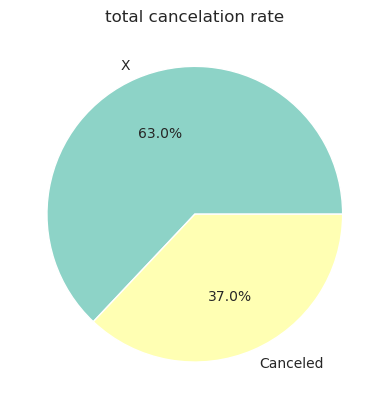

In [77]:
cm = sns.set_palette("Set3")

df["is_canceled"].value_counts()
fig = plt.pie(
    df["is_canceled"].value_counts().values,
    labels=["X", "Canceled"],
    autopct="%.1f%%",
)
plt.title("total cancelation rate")

Text(0.5, 1.0, 'Cancelation rates of Hotel type')

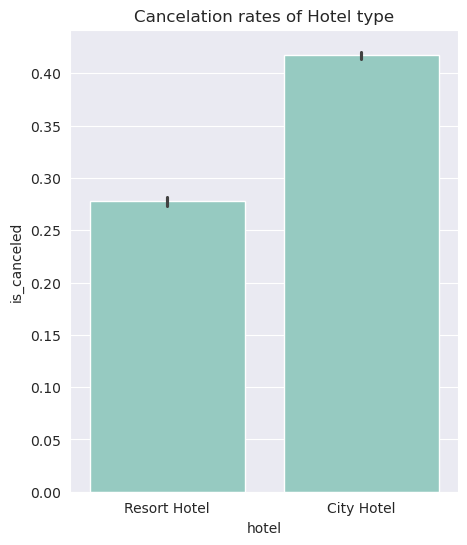

In [78]:
plt.figure(figsize=(5, 6))
sns.set_style("darkgrid")
sns.barplot(data=df, x="hotel", y="is_canceled", palette=cm)
plt.title("Cancelation rates of Hotel type")

대략적으로 City Hotel의 취소율이 높았음. 아무래도 접근성이 더 좋은 도시의 호텔 선택이 더 쉽지 않은가 싶다.

### (2) leadtime(호텔 도착 시점까지의 기간)에 따른 취소율

In [79]:
df["lead_time"].describe()

count    119390.000000
mean        104.011416
std         106.863097
min           0.000000
25%          18.000000
50%          69.000000
75%         160.000000
max         737.000000
Name: lead_time, dtype: float64

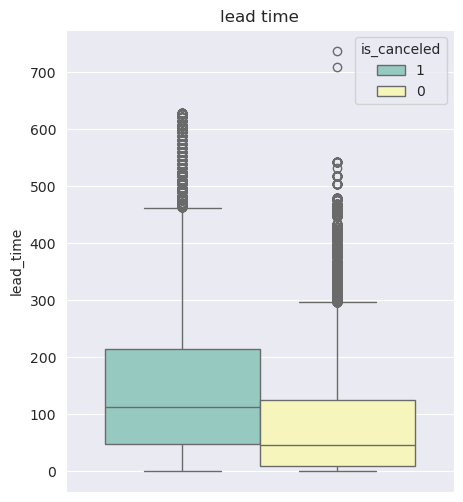

In [80]:
plt.figure(figsize=(5, 6))
df_cancled["lead_time"].describe()
sns.boxplot(data=df, y="lead_time", hue="is_canceled", hue_order=[1, 0])
plt.title("lead time")
plt.show()

leadtime은 취소가 된 데이터에서 더 큰 경향을 보였다. 따라서 예약 시간이 길수록 취소율은 높다고 할 수 있다.

### (3) arrival_date_year(연도별)취소율
혹시 취소율이 어떤 년도별 특징이 있지 않을까? 한번 시각화해서 알아보았다

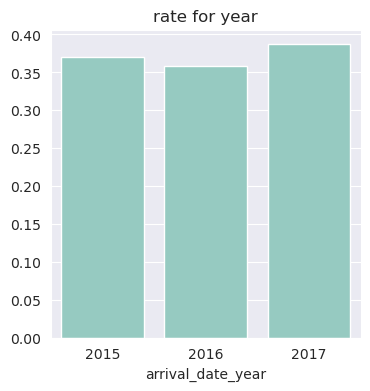

In [81]:
year_cancel_rate = (
    df_cancled["arrival_date_year"].value_counts().values
    / df["arrival_date_year"].value_counts().values
)
plt.figure(figsize=(4, 4))
sns.barplot(x=df_cancled["arrival_date_year"].value_counts().index, y=year_cancel_rate)
# sns.barplot(data= df, x="arrival_date_year", y=year_cancel_rate)

plt.title("rate for year")
plt.show()

연도별로 취소율은 유의미한 차이는 없었다

### (4) arrival_date_month(월별) 취소율

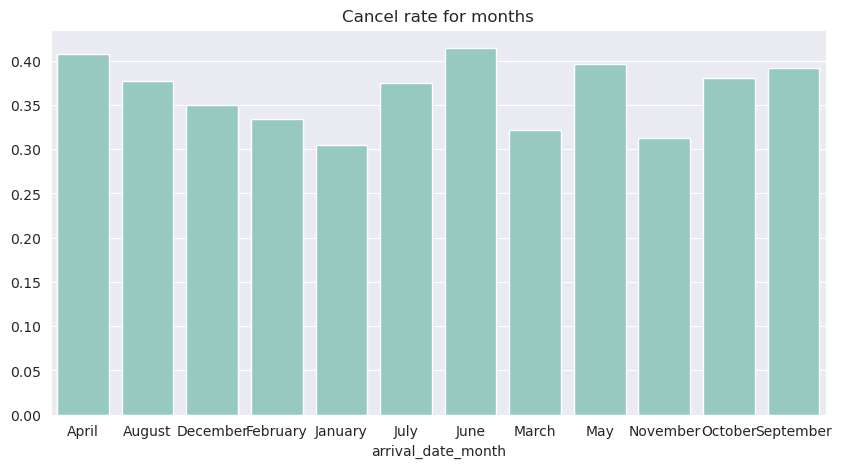

In [82]:

month = df["arrival_date_month"].value_counts().sort_index()
month_rate = (
    df_cancled["arrival_date_month"].value_counts().sort_index().values
    / df["arrival_date_month"].value_counts().sort_index().values
)
plt.figure(figsize=(10, 5))
sns.barplot(
    x=month.index, y=month_rate
)
plt.title("Cancel rate for months")
plt.show()

취소율은 4,5,6월 9,10월에 높게 나오면서 계절의 영향이 있는듯하다. 따라서 봄여름에 적절한 프로모션이 필요할듯 하다.
=> 봄가을 시즌 프로모션 강화

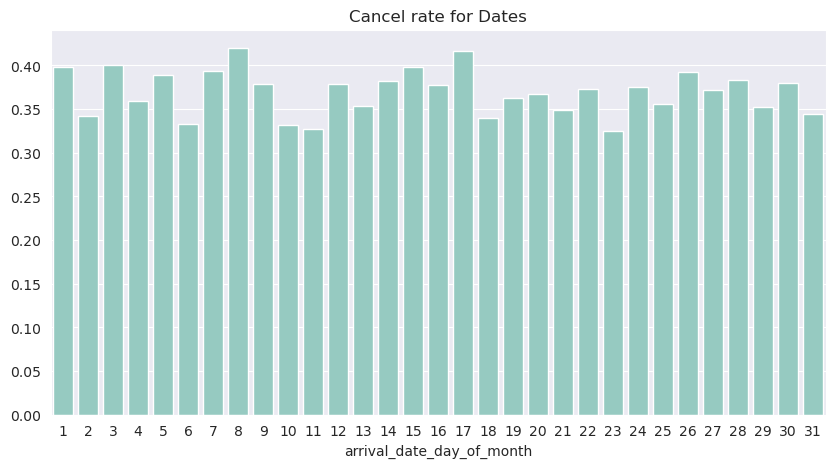

In [83]:

month = df["arrival_date_day_of_month"].value_counts().sort_index()
month_rate = (
    df_cancled["arrival_date_day_of_month"].value_counts().sort_index().values
    / df["arrival_date_day_of_month"].value_counts().sort_index().values
)
plt.figure(figsize=(10, 5))
sns.barplot(
    x=month.index, y=month_rate
)
plt.title("Cancel rate for Dates")
plt.show()

1일 부터 31일까지 취소율의 변화. 유의미한 정보는 1일에 예약수도도 취소율도 높게 나타났고 31일은 예약은 예약수도 없고 취소율도 낮았다. 즉, 월초의 예약보다는 **월말의 예약**이 더 안정적인 예약일 가능성이 높다는 결론을 낼 수 있다.

-> 월초 예약 고객들의 혜택을 강화

### (5) 주말(stays_in_weekend_nights) vs 주중(stays_in_week_nights)

일단 주중(5일)과 주말(2일)을 동등비교하긴 어렵지만 전체 예약수를 비교해보면

In [84]:
# 주중 투숙객 
df["stays_in_week_nights"].value_counts().head()
# df_week[].value_counts()
# df_cancled["stays_in_week_nights"].value_counts().sort_index()
# sns.boxplot(data=df,y = "stays_in_week_nights")

stays_in_week_nights
2    33684
1    30310
3    22258
5    11077
4     9563
Name: count, dtype: int64

주중 제일 예약이 많은 데이터의 취소율을 구해보면면

In [85]:
# 주중 투숙객 취소율 
df_cancled["stays_in_week_nights"].value_counts().head() / df["stays_in_week_nights"].value_counts().head()

stays_in_week_nights
2    0.441575
1    0.324348
3    0.382110
5    0.348560
4    0.365471
Name: count, dtype: float64

주중에는 하루(1) 숙박하는 고객의 취소율이 가장 낮았다.  
=> 따라서 2일 이상 숙박하는 고객에 대한 프로모션이 필요함

In [86]:
# 주말 투숙객
df["stays_in_weekend_nights"].value_counts().head()


stays_in_weekend_nights
0    51998
2    33308
1    30626
4     1855
3     1259
Name: count, dtype: int64

In [87]:
# 주말 투숙객 취소율 
df_cancled["stays_in_weekend_nights"].value_counts().head() / df["stays_in_weekend_nights"].value_counts().head()


stays_in_weekend_nights
0    0.375034
2    0.374835
1    0.359401
4    0.322372
3    0.352661
Name: count, dtype: float64

주말 투숙객은 0,1,2일 고객의 취소율이 가장 높았다. 1주일 이상 숙박하는 고객(4,3)는 취소율이 상대적으로 낮았다.  
=> 따라서 주말 0,1,2 투숙에 고객에 대한 프로모션이 필요함

### (6) 어린이(children)와 아이(babies)의 유무에 따른 취소율

<Axes: xlabel='children'>

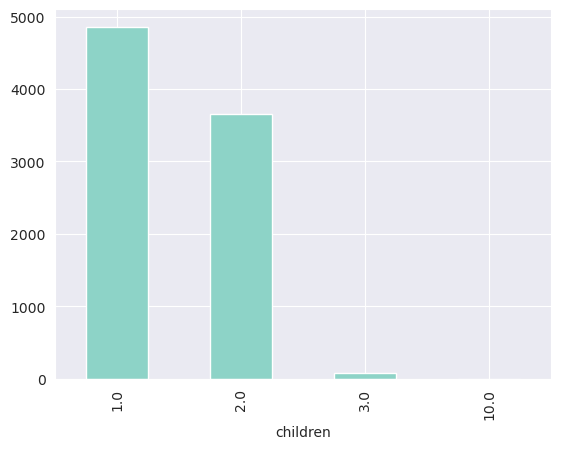

In [103]:
# 어린이 가족 취소 현황 
df["children"].value_counts().tail(4).plot(kind='bar')

어린이가 있는 가족의 예약 현황이다. 어린이(1) 가족과 어린이(2) 가족의 차이는 그렇게 크지 않다.

In [89]:
# 어린이가 있을때 취소율
df_cancled["children"].value_counts() / df["children"].value_counts()

children
0.0     0.370921
1.0     0.322362
2.0     0.421961
3.0     0.223684
10.0    1.000000
Name: count, dtype: float64

그러나 어린이(1)의 가족의 경우 0.32의 취소율이었지만 어린이(2)의 가족의 경우 0.42로 값이 유의미하게 높은걸 볼 수 있다.  
=> 따라서 어린이(2) 가족에 대한 프로모션을 강화해야한다

<Axes: xlabel='babies'>

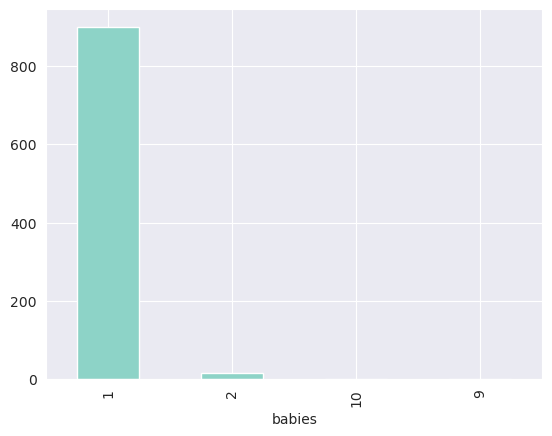

In [108]:
# 전체 가족에서 아기 가족이 있는 현황황 
df["babies"].value_counts().tail(4).plot(kind='bar')

아기가 있는 가족 중에 1명이 있는 가족이 대부분이었다. 

In [91]:
# 아기가 있을때 취소율율
df_cancled["babies"].value_counts().get(1) / df["babies"].value_counts().get(1)

np.float64(0.18333333333333332)

그러나 이 가족 유형의 경우 취소율이 높지는 않았다(18%)

### (7) 식사 유형(meal)에 따른 취소율

<Axes: xlabel='meal'>

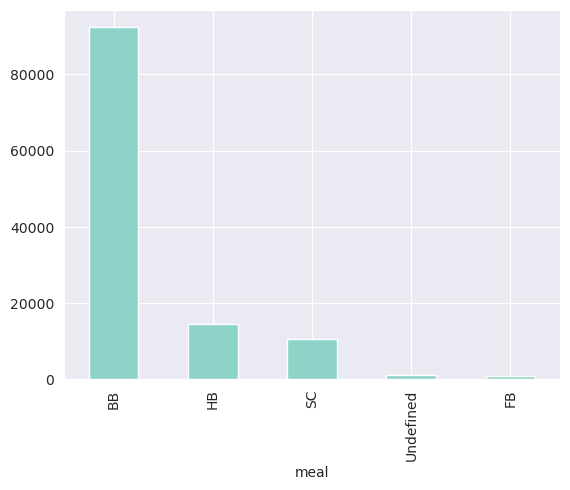

In [94]:
df['meal'].value_counts().plot(kind='bar')

In [113]:
df_cancled["meal"].value_counts() / df['meal'].value_counts()

meal
BB           0.373849
FB           0.598997
HB           0.344603
SC           0.372394
Undefined    0.244654
Name: count, dtype: float64

전체 고객에서 BB의 예약이 많았지만 취소율의 경우 FB가 유의미하게 높았다.  
=> BB와 HB의 경우 아침과 저녁식사가 높았으므로 점심에 대한 프로모션 강화가 필요

### (8) 이전 방문 고객(is_repeated_guest), 취소 여부(previous_cancellations, previous_bookings_not_canceled)에 따른 취소율



Text(0.5, 1.0, 'Return rate')

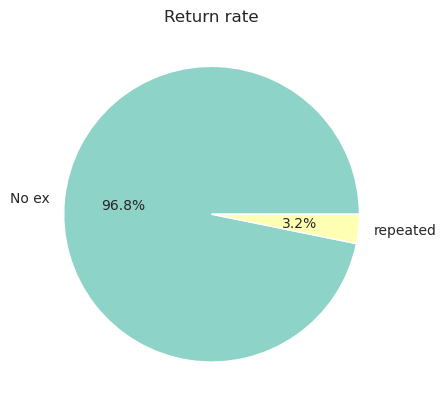

In [120]:
df["is_repeated_guest"].value_counts()
fig = plt.pie(
    df["is_repeated_guest"].value_counts().values,
    labels=["No ex", "repeated"],
    autopct="%.1f%%",
)
plt.title("Return rate")

전체 고객중에 3%를 차지하는 재방문 고객은 그렇게까지 중요한 유형은 아니다.   
  
이제 취소율에 대한 데이터를 살펴보면 

In [130]:
df["previous_cancellations"].value_counts()

previous_cancellations
0     112906
1       6051
2        116
3         65
24        48
11        35
4         31
26        26
25        25
6         22
5         19
19        19
14        14
13        12
21         1
Name: count, dtype: int64

In [129]:
df["previous_bookings_not_canceled"].value_counts()

previous_bookings_not_canceled
0     115770
1       1542
2        580
3        333
4        229
       ...  
68         1
69         1
70         1
71         1
72         1
Name: count, Length: 73, dtype: int64

이전에 취소한적이 없는 사람(previous_bookings_not_canceled)에 비해 취소 이력이 있는 사람의 취소가 4배나 높았다. 

=> 따라서 취소를 한번 했던 고객에 대한 대응이 필요
 

### Conclusion

이 데이터에 대한 EDA 결과 이번 호텔에서 나온 유의미한 데이터를 살펴보면면

(1) 호텔 종류에 따른 취소율이 달랐다. 즉, 호텔 종류에 따라 추가적인 분석이 반드시 필요하다.  
(2) lead time이 길수록 취소율은 높았다  
(3) 취소율에 대한 연도별, 월별, 일별에 대한 접근을 달리해야한다.  
(4) 주말, 주중 고객에 대한 대응을 다르게 접근해야 한다.  
(5) 어린이가 포함된 가족, 아기가 포함된 가족에 대한 프로모션이 필요  
(6) 식사 유형에서 점심에 대한 프로모션 강화  
(7) 이전 방문 여부에 대한 취소율 재고 방법  필요  

이 외에도 데이터에서 예약 변경, 대기 일수, 노쇼 등등 여러 변수에 대한 분석도 필요하다. 또한 데이터의 상관관계를 분석하는 과정 또한 필요해보인다